# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [922]:
# Your code here
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')

cols = [ ]
for col in df.columns:
    cols.append(col.lower())
df.columns = cols

df.rename(columns=lambda x: x.replace(' ','_'),inplace=True)

df = df.rename(columns={'st':'state'})

df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [923]:
df["gender"].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [924]:
# Your code here

def clean(x):
    if x in ['M', 'MALE']:
        return 'M'
    elif x in ['Femal', 'female']:
        return 'F'
    else:
        return 'U'


In [925]:
df["gender"] = list(map(clean, df["gender"]))

In [926]:
df["gender"].unique()

array(['U', 'M', 'F'], dtype=object)

In [927]:
def full(x):
    if x=="AZ":
        df.rename(columns = {"AZ":"Arizona"})
    elif x == "Cali":
        df.rename(columns = {"Cali":"California"})
    elif x == "WA":
        df.rename(columns = {"WA":"Washington"})
    else:
        return x
df["state"] = list(map(full,df["state"]))
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,U,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,U,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [928]:
df["education"] = df["education"].str.replace("Bachelors","Bachelor")
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,U,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,U,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [929]:
df['customer_lifetime_value'] = df['customer_lifetime_value'].str.replace('%','')
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,U,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,U,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [930]:
df["vehicle_class"] = df["vehicle_class"].str.replace("Luxury SUV","Luxury")
df["vehicle_class"] = df["vehicle_class"].str.replace("Sports Car","Luxury")
df["vehicle_class"] = df["vehicle_class"].str.replace("Luxury Car","Luxury")
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,U,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,U,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [931]:
# Your code here
df.dtypes


customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value       object
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [932]:
df._get_numeric_data()

,income,monthly_premium_auto,total_claim_amount
0,0.0,1000.0,2.704934
1,0.0,94.0,1131.464935
2,48767.0,108.0,566.472247
3,0.0,106.0,529.881344
4,36357.0,68.0,17.269323
...,...,...,...
4003,NaN,NaN,NaN
4004,NaN,NaN,NaN
4005,NaN,NaN,NaN
4006,NaN,NaN,NaN


In [933]:
df['customer_lifetime_value'] =  pd.to_numeric(df['customer_lifetime_value'], errors='coerce')
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,U,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,U,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [934]:
df["number_of_open_complaints"].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [935]:
df[['Value1','Value2','Value3']] = df['number_of_open_complaints'].str.split('/', expand=True)
df.head(5)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount,Value1,Value2,Value3
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934,1,0,00
1,QZ44356,Arizona,U,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,1,0,00
2,AI49188,Nevada,U,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,1,0,00
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344,1,0,00
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,1,0,00


In [936]:
df['Value2'] =  pd.to_numeric(df['Value2'], errors='coerce')
df.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
Value1                        object
Value2                       float64
Value3                        object
dtype: object

In [937]:
df=df.rename(columns={'Value2':'final_number_of_open_complaints'})
df.head(5)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount,Value1,final_number_of_open_complaints,Value3
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934,1,0.0,00
1,QZ44356,Arizona,U,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,1,0.0,00
2,AI49188,Nevada,U,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,1,0.0,00
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344,1,0.0,00
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,1,0.0,00


In [938]:
df = df.drop(['number_of_open_complaints'], axis=1)


In [939]:
df.head(5)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount,Value1,final_number_of_open_complaints,Value3
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934,1,0.0,00
1,QZ44356,Arizona,U,Bachelor,697953.59,0.0,94.0,Personal Auto,Four-Door Car,1131.464935,1,0.0,00
2,AI49188,Nevada,U,Bachelor,1288743.17,48767.0,108.0,Personal Auto,Two-Door Car,566.472247,1,0.0,00
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,Corporate Auto,SUV,529.881344,1,0.0,00
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,Personal Auto,Four-Door Car,17.269323,1,0.0,00


In [940]:
df.dtypes

customer                            object
state                               object
gender                              object
education                           object
customer_lifetime_value            float64
income                             float64
monthly_premium_auto               float64
policy_type                         object
vehicle_class                       object
total_claim_amount                 float64
Value1                              object
final_number_of_open_complaints    float64
Value3                              object
dtype: object

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [941]:
# Your code here
df.isna().sum()

customer                           2937
state                              3112
gender                                0
education                          2937
customer_lifetime_value            2940
income                             2937
monthly_premium_auto               2937
policy_type                        2937
vehicle_class                      2937
total_claim_amount                 2937
Value1                             2937
final_number_of_open_complaints    2937
Value3                             2937
dtype: int64

In [942]:
df['gender'].unique()

array(['U', 'M', 'F'], dtype=object)

In [943]:
df.shape

(4008, 13)

In [944]:
numerical = df._get_numeric_data()
numerical

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,final_number_of_open_complaints
0,NaN,0.0,1000.0,2.704934,0.0
1,697953.59,0.0,94.0,1131.464935,0.0
2,1288743.17,48767.0,108.0,566.472247,0.0
3,764586.18,0.0,106.0,529.881344,0.0
4,536307.65,36357.0,68.0,17.269323,0.0
...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN


In [945]:
df1=df.drop_duplicates() #we assume duplicates are those with NaN in all columns
df1

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount,Value1,final_number_of_open_complaints,Value3
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934,1,0.0,00
1,QZ44356,Arizona,U,Bachelor,697953.59,0.0,94.0,Personal Auto,Four-Door Car,1131.464935,1,0.0,00
2,AI49188,Nevada,U,Bachelor,1288743.17,48767.0,108.0,Personal Auto,Two-Door Car,566.472247,1,0.0,00
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,Corporate Auto,SUV,529.881344,1,0.0,00
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,Personal Auto,Four-Door Car,17.269323,1,0.0,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,None,U,High School or Below,2031499.76,63209.0,102.0,Personal Auto,SUV,207.320041,1,2.0,00
1068,GS98873,Arizona,U,Bachelor,323912.47,16061.0,88.0,Personal Auto,Four-Door Car,633.600000,1,0.0,00
1069,CW49887,California,U,Master,462680.11,79487.0,114.0,Special Auto,SUV,547.200000,1,0.0,00
1070,MY31220,California,U,College,899704.02,54230.0,112.0,Personal Auto,Two-Door Car,537.600000,1,0.0,00


In [946]:
df1.isna().sum()

customer                             1
state                              176
gender                               0
education                            1
customer_lifetime_value              4
income                               1
monthly_premium_auto                 1
policy_type                          1
vehicle_class                        1
total_claim_amount                   1
Value1                               1
final_number_of_open_complaints      1
Value3                               1
dtype: int64

In [947]:
mean_customer_lifetime_value = df1['customer_lifetime_value'].mean() #filling nulls of numerical values with mean
mean_customer_lifetime_value
df1['customer_lifetime_value'] = df1['customer_lifetime_value'].fillna(mean_customer_lifetime_value)

/var/folders/pf/nfj1603d1fjc2xkhkrlls95m0000gn/T/ipykernel_55777/153348454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['customer_lifetime_value'] = df1['customer_lifetime_value'].fillna(mean_customer_lifetime_value)


In [948]:
df1['customer_lifetime_value'].mean()

793690.2593445693

In [949]:
df1.isna().sum()

customer                             1
state                              176
gender                               0
education                            1
customer_lifetime_value              0
income                               1
monthly_premium_auto                 1
policy_type                          1
vehicle_class                        1
total_claim_amount                   1
Value1                               1
final_number_of_open_complaints      1
Value3                               1
dtype: int64

In [950]:
mean_income = df1['income'].mean()
mean_income
df1['income'] = df1['income'].fillna(mean_income)

/var/folders/pf/nfj1603d1fjc2xkhkrlls95m0000gn/T/ipykernel_55777/1419492160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['income'] = df1['income'].fillna(mean_income)


In [951]:
df1.isna().sum()

customer                             1
state                              176
gender                               0
education                            1
customer_lifetime_value              0
income                               0
monthly_premium_auto                 1
policy_type                          1
vehicle_class                        1
total_claim_amount                   1
Value1                               1
final_number_of_open_complaints      1
Value3                               1
dtype: int64

In [952]:
df1

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount,Value1,final_number_of_open_complaints,Value3
0,RB50392,Washington,U,Master,7.936903e+05,0.000000,1000.0,Personal Auto,Four-Door Car,2.704934,1,0.0,00
1,QZ44356,Arizona,U,Bachelor,6.979536e+05,0.000000,94.0,Personal Auto,Four-Door Car,1131.464935,1,0.0,00
2,AI49188,Nevada,U,Bachelor,1.288743e+06,48767.000000,108.0,Personal Auto,Two-Door Car,566.472247,1,0.0,00
3,WW63253,California,M,Bachelor,7.645862e+05,0.000000,106.0,Corporate Auto,SUV,529.881344,1,0.0,00
4,GA49547,Washington,M,High School or Below,5.363077e+05,36357.000000,68.0,Personal Auto,Four-Door Car,17.269323,1,0.0,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,None,U,High School or Below,2.031500e+06,63209.000000,102.0,Personal Auto,SUV,207.320041,1,2.0,00
1068,GS98873,Arizona,U,Bachelor,3.239125e+05,16061.000000,88.0,Personal Auto,Four-Door Car,633.600000,1,0.0,00
1069,CW49887,California,U,Master,4.626801e+05,79487.000000,114.0,Special Auto,SUV,547.200000,1,0.0,00
1070,MY31220,California,U,College,8.997040e+05,54230.000000,112.0,Personal Auto,Two-Door Car,537.600000,1,0.0,00


In [953]:
df1.drop(1071,axis=0,inplace=True) #inplace=True assigns what is written to df1
df1

/var/folders/pf/nfj1603d1fjc2xkhkrlls95m0000gn/T/ipykernel_55777/2680254603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(1071,axis=0,inplace=True) #inplace=True assigns what is written to df1


,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount,Value1,final_number_of_open_complaints,Value3
0,RB50392,Washington,U,Master,7.936903e+05,0.0,1000.0,Personal Auto,Four-Door Car,2.704934,1,0.0,00
1,QZ44356,Arizona,U,Bachelor,6.979536e+05,0.0,94.0,Personal Auto,Four-Door Car,1131.464935,1,0.0,00
2,AI49188,Nevada,U,Bachelor,1.288743e+06,48767.0,108.0,Personal Auto,Two-Door Car,566.472247,1,0.0,00
3,WW63253,California,M,Bachelor,7.645862e+05,0.0,106.0,Corporate Auto,SUV,529.881344,1,0.0,00
4,GA49547,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,Personal Auto,Four-Door Car,17.269323,1,0.0,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3.059550e+05,38644.0,78.0,Personal Auto,Four-Door Car,361.455219,1,1.0,00
1067,VJ51327,None,U,High School or Below,2.031500e+06,63209.0,102.0,Personal Auto,SUV,207.320041,1,2.0,00
1068,GS98873,Arizona,U,Bachelor,3.239125e+05,16061.0,88.0,Personal Auto,Four-Door Car,633.600000,1,0.0,00
1069,CW49887,California,U,Master,4.626801e+05,79487.0,114.0,Special Auto,SUV,547.200000,1,0.0,00


In [954]:
df1.isna().sum()

customer                             0
state                              175
gender                               0
education                            0
customer_lifetime_value              0
income                               0
monthly_premium_auto                 0
policy_type                          0
vehicle_class                        0
total_claim_amount                   0
Value1                               0
final_number_of_open_complaints      0
Value3                               0
dtype: int64

In [955]:
df1['state'].value_counts(dropna=False) #shows the nulls 

state
Oregon        320
California    211
Arizona       186
None          175
Nevada         98
Washington     81
Name: count, dtype: int64

In [956]:
df1['state']=df1['state'].fillna('Oregon') #assign all the formula to df1['state']

/var/folders/pf/nfj1603d1fjc2xkhkrlls95m0000gn/T/ipykernel_55777/3593544600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['state']=df1['state'].fillna('Oregon') #assign all the formula to df1['state']


In [957]:
df1.isna().sum() #no null values left

customer                           0
state                              0
gender                             0
education                          0
customer_lifetime_value            0
income                             0
monthly_premium_auto               0
policy_type                        0
vehicle_class                      0
total_claim_amount                 0
Value1                             0
final_number_of_open_complaints    0
Value3                             0
dtype: int64

In [958]:
mean_monthly_premium_auto = df1['monthly_premium_auto'].mean()
mean_monthly_premium_auto
df1['monthly_premium_auto'] = df1['monthly_premium_auto'].fillna(mean_monthly_premium_auto)

/var/folders/pf/nfj1603d1fjc2xkhkrlls95m0000gn/T/ipykernel_55777/104114302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['monthly_premium_auto'] = df1['monthly_premium_auto'].fillna(mean_monthly_premium_auto)


## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [959]:
# Your code here DONE

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [960]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [961]:
# Your code here

# Lab part 2

Show DataFrame info.
Describe DataFrame.
Show a plot of the Gender breakdown.
Show a plot of Income by State.
Show a plot of the Policy Type by the Total Claim Amount.
Show a plot of the Education by Vehicle Class.
What insights can you establish from these plots?
What other plots do you feel would be beneficial?

In [962]:
df1.head(5)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount,Value1,final_number_of_open_complaints,Value3
0,RB50392,Washington,U,Master,7.936903e+05,0.0,1000.0,Personal Auto,Four-Door Car,2.704934,1,0.0,00
1,QZ44356,Arizona,U,Bachelor,6.979536e+05,0.0,94.0,Personal Auto,Four-Door Car,1131.464935,1,0.0,00
2,AI49188,Nevada,U,Bachelor,1.288743e+06,48767.0,108.0,Personal Auto,Two-Door Car,566.472247,1,0.0,00
3,WW63253,California,M,Bachelor,7.645862e+05,0.0,106.0,Corporate Auto,SUV,529.881344,1,0.0,00
4,GA49547,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,Personal Auto,Four-Door Car,17.269323,1,0.0,00


In [963]:
df1.describe()

df1.describe().T #transposes columns and rows
#50% is the median


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,793690.259345,642575.704559,200435.070000,404853.460000,588718.200000,894520.995,5.816655e+06
income,1071.0,39295.701214,30469.427060,0.000000,14072.000000,36234.000000,64631.000,9.996000e+04
monthly_premium_auto,1071.0,193.234360,1601.190369,61.000000,68.000000,83.000000,109.500,3.535400e+04
total_claim_amount,1071.0,404.986909,293.027260,0.382107,202.157702,354.729129,532.800,2.893240e+03
final_number_of_open_complaints,1071.0,0.394024,0.883769,0.000000,0.000000,0.000000,0.000,5.000000e+00


In [964]:
#Plot of gender breakdown
import matplotlib.pyplot as plt
import seaborn as sns 


In [965]:
df1['gender'].value_counts()

gender
U    613
M    413
F     45
Name: count, dtype: int64

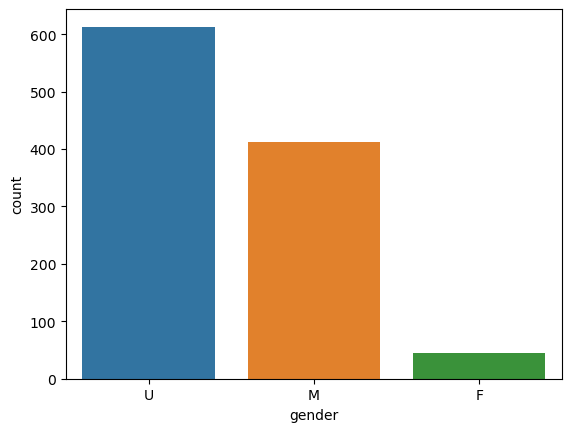

In [966]:
sns.countplot(x='gender', data=df1) #(has all the arguments) the data that I want to use is data (name of the data frame) = what I named as df1
plt.show()

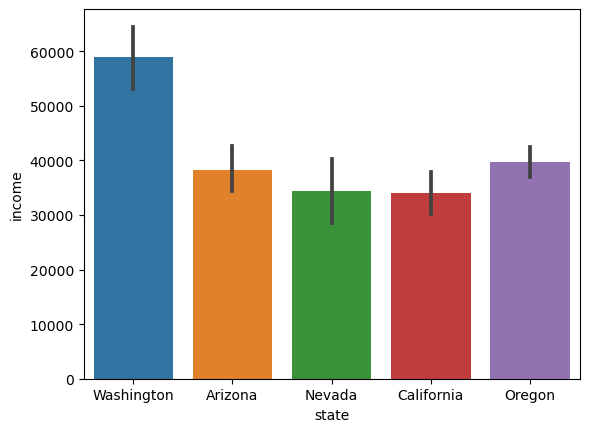

In [967]:
#Show a plot of Income by State.
sns.barplot(x="state", y="income", data=df1)
plt.show()

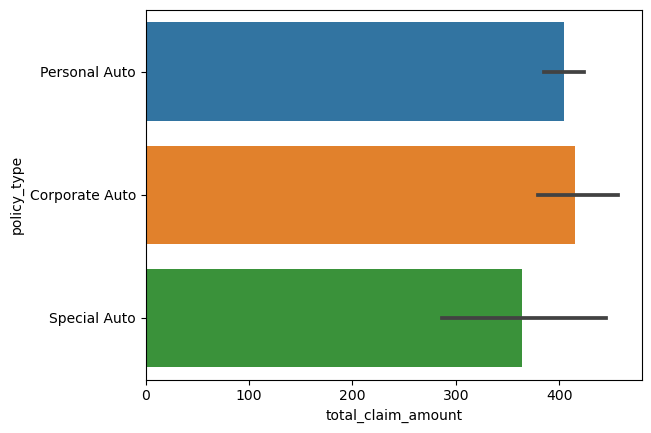

In [968]:
#Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(x="total_claim_amount", y="policy_type", data=df1)
plt.show()

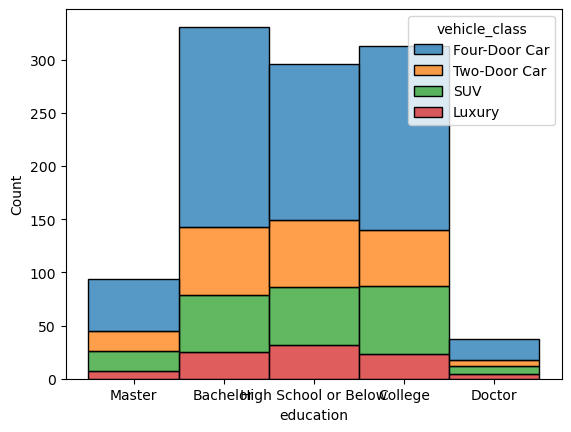

In [969]:
#Show a plot of the Education by Vehicle Class.
sns.histplot(x="education", hue="vehicle_class", data=df1, multiple='stack')
plt.show()

In [970]:
#Insights:
#Most of the people in the data set did not specify their gender
#The state with the highest income is Washington, followed by Oregon
#The highest total claim amount corresponds to the Corporate Auto policies
#The more educated people are, the less vehicles they have (Doctors and Master level education have the lowest counts regardless of the type of vehicle)
#The bachelors are the ones that have the highest total count of vehicles insured, they have mostly 4 door cars and then 2 doors 
#The people that have the highest amount of luxury vehicles are in high school

# Lab customer analysis round 4

Check the data types of the columns. Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use np.number and object to select the numerical data types and categorical data types respectively)

In [971]:
df1.dtypes


customer                            object
state                               object
gender                              object
education                           object
customer_lifetime_value            float64
income                             float64
monthly_premium_auto               float64
policy_type                         object
vehicle_class                       object
total_claim_amount                 float64
Value1                              object
final_number_of_open_complaints    float64
Value3                              object
dtype: object

In [972]:
df1_numerical=df1._get_numeric_data()
df1_numerical

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,final_number_of_open_complaints
0,7.936903e+05,0.0,1000.0,2.704934,0.0
1,6.979536e+05,0.0,94.0,1131.464935,0.0
2,1.288743e+06,48767.0,108.0,566.472247,0.0
3,7.645862e+05,0.0,106.0,529.881344,0.0
4,5.363077e+05,36357.0,68.0,17.269323,0.0
...,...,...,...,...,...
1066,3.059550e+05,38644.0,78.0,361.455219,1.0
1067,2.031500e+06,63209.0,102.0,207.320041,2.0
1068,3.239125e+05,16061.0,88.0,633.600000,0.0
1069,4.626801e+05,79487.0,114.0,547.200000,0.0


In [973]:
categorical = [cols for cols in df1.columns if df1[cols].dtype == 'object']
numerical = [cols for cols in df1.columns if df1[cols].dtype in ['float64','int64']]

categorical = df1[categorical]
numerical = df1 [numerical]

categorical.head(5)


,customer,state,gender,education,policy_type,vehicle_class,Value1,Value3
0,RB50392,Washington,U,Master,Personal Auto,Four-Door Car,1,00
1,QZ44356,Arizona,U,Bachelor,Personal Auto,Four-Door Car,1,00
2,AI49188,Nevada,U,Bachelor,Personal Auto,Two-Door Car,1,00
3,WW63253,California,M,Bachelor,Corporate Auto,SUV,1,00
4,GA49547,Washington,M,High School or Below,Personal Auto,Four-Door Car,1,00


In [974]:
numerical.head(5)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,final_number_of_open_complaints
0,7.936903e+05,0.0,1000.0,2.704934,0.0
1,6.979536e+05,0.0,94.0,1131.464935,0.0
2,1.288743e+06,48767.0,108.0,566.472247,0.0
3,7.645862e+05,0.0,106.0,529.881344,0.0
4,5.363077e+05,36357.0,68.0,17.269323,0.0


Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
Do the distributions for different numerical variables look like a normal distribution?

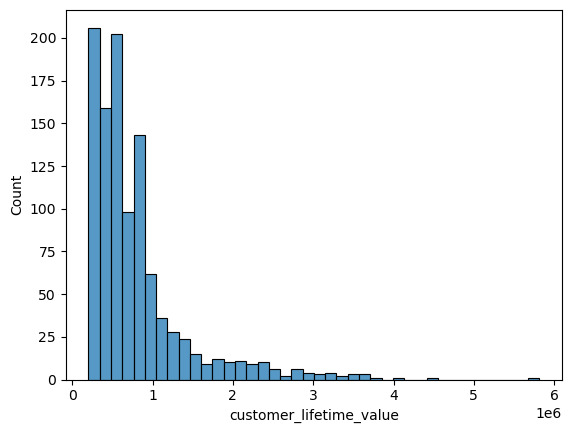

In [975]:
sns.histplot(df1['customer_lifetime_value'], bins=40) #the larger the number of bins, the easier to analyse the data
plt.show()
#doesn't look like a normal distribution

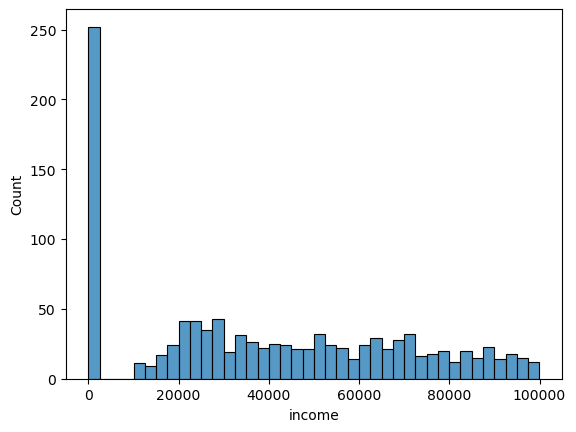

In [976]:
sns.histplot(df1['income'], bins=40) #the larger the number of bins, the easier to analyse the data
plt.show()
#doesn't look like a normal distribution

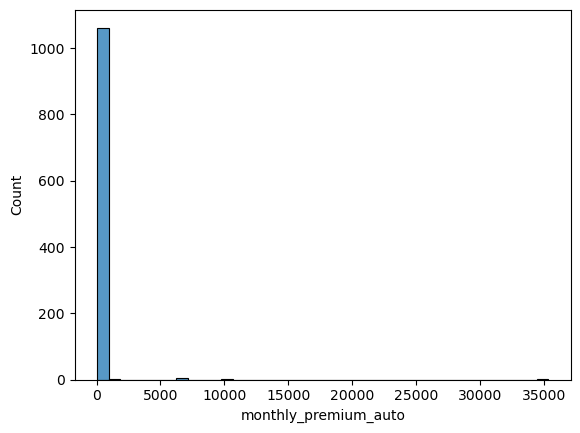

In [977]:
sns.histplot(df1['monthly_premium_auto'], bins=40) #the larger the number of bins, the easier to analyse the data
plt.show()
#doesn't look like a normal distribution

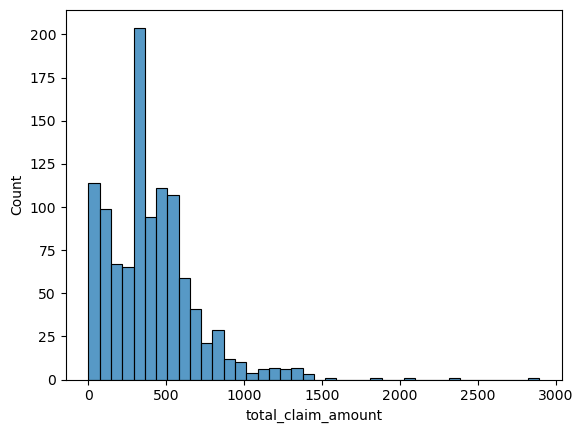

In [978]:
sns.histplot(df1['total_claim_amount'], bins=40) #the larger the number of bins, the easier to analyse the data
plt.show()
#doesn't look like a normal distribution

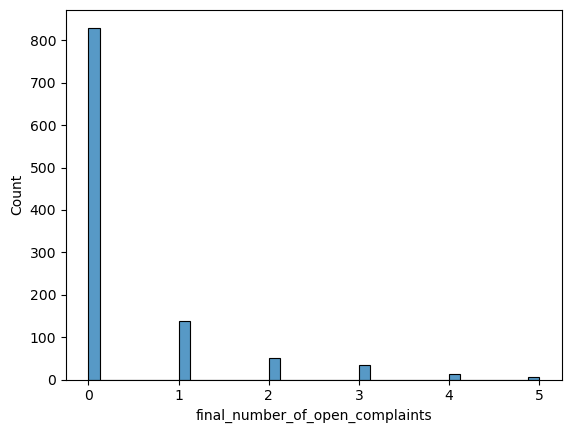

In [979]:
sns.histplot(df1['final_number_of_open_complaints'], bins=40) #the larger the number of bins, the easier to analyse the data
plt.show()
#doesn't look like a normal distribution

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [980]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

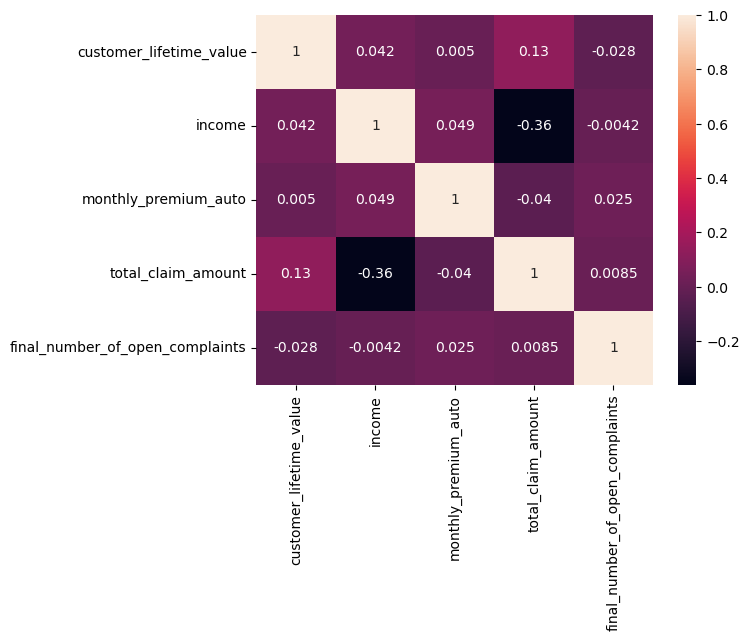

In [981]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
#

In [982]:
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,final_number_of_open_complaints
customer_lifetime_value,1.000000,0.041610,0.005027,0.131452,-0.028147
income,0.041610,1.000000,0.049100,-0.361282,-0.004161
monthly_premium_auto,0.005027,0.049100,1.000000,-0.040493,0.025138
total_claim_amount,0.131452,-0.361282,-0.040493,1.000000,0.008470
final_number_of_open_complaints,-0.028147,-0.004161,0.025138,0.008470,1.000000


In [983]:
#the feature that has the highest colinearity with the total_claim_amount is the customer_lifetime_value
#there no is colinearity between the features, however, the highest colinearity is between monthly_premium_auto and income

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [984]:
reduced_data = numerical.drop(['monthly_premium_auto','income'],axis=1)
reduced_data.columns

Index(['customer_lifetime_value', 'total_claim_amount',
       'final_number_of_open_complaints'],
      dtype='object')

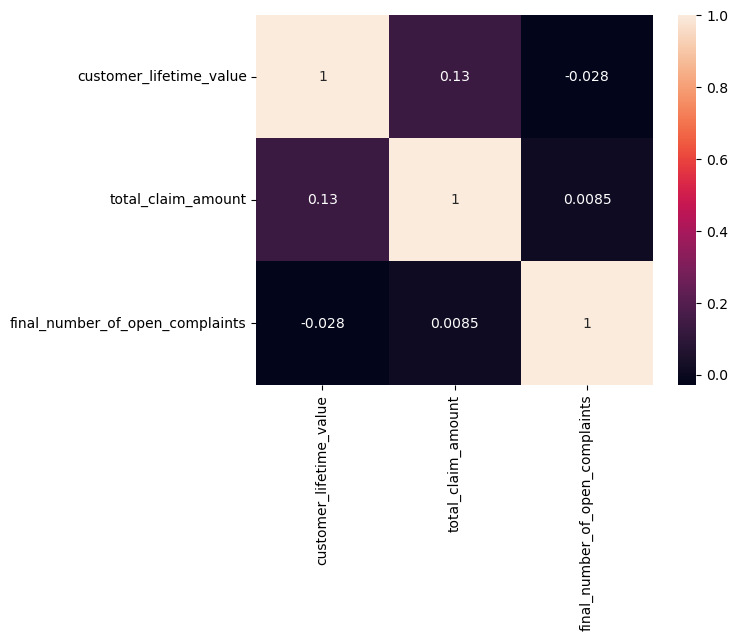

In [985]:
correlations_matrix2 = reduced_data.corr()
sns.heatmap(correlations_matrix2, annot=True)
plt.show()

# Lab customer analysis round 5

In [986]:
y = df1['total_claim_amount']
X = df1.drop(['total_claim_amount'], axis=1)

In [987]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

transformer = MinMaxScaler().fit(numerical)
X_normalized = transformer.transform(numerical)
print(X_normalized.shape)
X_normalized=pd.DataFrame(X_normalized, columns=numerical.columns) #creates data frame for visualization

(1071, 5)


In [988]:
transformer = StandardScaler().fit(numerical)
X_standardized = transformer.transform(numerical)
print(X_standardized.shape)
pd.DataFrame(X_standardized, columns=numerical.columns)

(1071, 5)


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,final_number_of_open_complaints
0,0.000000,-1.290279,0.504089,-1.373490,-0.446053
1,-0.149059,-1.290279,-0.062004,2.480375,-0.446053
2,0.770780,0.310991,-0.053257,0.551351,-0.446053
3,-0.045314,-1.290279,-0.054506,0.426420,-0.446053
4,-0.400735,-0.096493,-0.078250,-1.323763,-0.446053
...,...,...,...,...,...
1066,-0.759386,-0.021399,-0.072002,-0.148628,0.685992
1067,1.927225,0.785196,-0.057006,-0.674883,1.818038
1068,-0.731427,-0.762914,-0.065753,0.780541,-0.446053
1069,-0.515371,1.319686,-0.049508,0.485550,-0.446053


In [989]:
pd.DataFrame(X_standardized, columns=numerical.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,-1.326877e-17,1.000467,-0.923677,-0.605405,-0.319134,0.156990,7.820575
income,1071.0,9.951579e-17,1.000467,-1.290279,-0.828223,-0.100531,0.831887,1.991919
monthly_premium_auto,1071.0,1.326877e-17,1.000467,-0.082624,-0.078250,-0.068877,-0.052319,21.969400
total_claim_amount,1071.0,-1.791284e-16,1.000467,-1.381420,-0.692509,-0.171592,0.436385,8.495507
final_number_of_open_complaints,1071.0,3.980632e-17,1.000467,-0.446053,-0.446053,-0.446053,-0.446053,5.214174


# Lab customer analysis round 6

In [990]:
X_normalized
X_cat = X.select_dtypes(include = object)

In [991]:
X_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,0.105632,0.114414,0.0,0.036398,0.069136,0.123586,1.0
income,1071.0,0.393114,0.304816,0.0,0.140776,0.362485,0.646569,1.0
monthly_premium_auto,1071.0,0.003747,0.045368,0.0,0.000198,0.000623,0.001374,1.0
total_claim_amount,1071.0,0.139863,0.101293,0.0,0.069750,0.122490,0.184046,1.0
final_number_of_open_complaints,1071.0,0.078805,0.176754,0.0,0.000000,0.000000,0.000000,1.0


In [992]:
X_cat.describe()

,customer,state,gender,education,policy_type,vehicle_class,Value1,Value3
count,1071,1071,1071,1071,1071,1071,1071,1071
unique,1071,5,3,5,3,4,1,1
top,RB50392,Oregon,U,Bachelor,Personal Auto,Four-Door Car,1,00
freq,1,495,613,331,780,576,1071,1071


One Hot/Label Encoding (categorical).

In [993]:
X_cat["Value1"].unique()

array(['1'], dtype=object)

In [994]:
X_cat = X_cat.drop(['customer','Value1', 'Value3'], axis=1)
X_cat

,state,gender,education,policy_type,vehicle_class
0,Washington,U,Master,Personal Auto,Four-Door Car
1,Arizona,U,Bachelor,Personal Auto,Four-Door Car
2,Nevada,U,Bachelor,Personal Auto,Two-Door Car
3,California,M,Bachelor,Corporate Auto,SUV
4,Washington,M,High School or Below,Personal Auto,Four-Door Car
...,...,...,...,...,...
1066,Oregon,M,Master,Personal Auto,Four-Door Car
1067,Oregon,U,High School or Below,Personal Auto,SUV
1068,Arizona,U,Bachelor,Personal Auto,Four-Door Car
1069,California,U,Master,Special Auto,SUV


In [995]:
from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder().fit(X_cat)
encoder = OneHotEncoder(drop='first').fit(X_cat)
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray() #toarray()is making the data more readable 
print(encoded)
#onehot_encoded = pd.DataFrame(encoded,columns=['Female', 'Male','U'])
onehot_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())#each column has the name
onehot_encoded.head(5)

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['F', 'M', 'U'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Four-Door Car', 'Luxury', 'SUV', 'Two-Door Car'], dtype=object)]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,gender_U,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [996]:
print(encoder.get_feature_names_out())

['state_California' 'state_Nevada' 'state_Oregon' 'state_Washington'
 'gender_M' 'gender_U' 'education_College' 'education_Doctor'
 'education_High School or Below' 'education_Master'
 'policy_type_Personal Auto' 'policy_type_Special Auto'
 'vehicle_class_Luxury' 'vehicle_class_SUV' 'vehicle_class_Two-Door Car']


In [997]:
#Concat DataFrames
X = pd.concat([X_normalized, onehot_encoded], axis=1) 

In [998]:
X.head(5)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,final_number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,gender_U,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.105632,0.000000,0.026606,0.000803,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.088586,0.000000,0.000935,0.390992,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.193779,0.487865,0.001332,0.195685,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.100450,0.000000,0.001275,0.183037,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.059804,0.363715,0.000198,0.005838,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [999]:
#Linear Regression
#Train-test split.
#Apply linear regression.

In [1000]:
X = X.drop('total_claim_amount', axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,final_number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,gender_U,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.105632,0.000000,0.026606,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.088586,0.000000,0.000935,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.193779,0.487865,0.001332,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.100450,0.000000,0.001275,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.059804,0.363715,0.000198,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0.018788,0.386595,0.000482,0.2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1067,0.326031,0.632343,0.001162,0.4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1068,0.021986,0.160674,0.000765,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1069,0.046694,0.795188,0.001502,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [1001]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [1002]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(749, 19)
(322, 19)
(749,)
(322,)


In [1003]:
print(y)

0          2.704934
1       1131.464935
2        566.472247
3        529.881344
4         17.269323
           ...     
1066     361.455219
1067     207.320041
1068     633.600000
1069     547.200000
1070     537.600000
Name: total_claim_amount, Length: 1071, dtype: float64


In [1004]:
X_train.head()


,customer_lifetime_value,income,monthly_premium_auto,final_number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,gender_U,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
634,0.013683,0.370528,0.000283,0.2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
465,0.286128,0.646459,0.000425,0.2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
516,0.019295,0.185654,0.000538,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
601,0.007701,0.488946,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1017,0.053554,0.483473,0.000057,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [1005]:
y_train.head()

634       9.071305
465     364.800000
516     384.000000
601       1.838367
1017    108.138715
Name: total_claim_amount, dtype: float64

In [1006]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [1007]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.3815997093326964

In [1008]:
#r2_score is very low. Recommended to generate the model with a few features

In [1009]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.36769828046589614

In [1010]:
y_test[:5]

184    792.000000
572    653.656680
309    321.600000
930    311.329282
711    312.000000
Name: total_claim_amount, dtype: float64

In [1011]:
predictions_test[:5]

array([724.46079158, 454.3224371 , 403.28377331, 442.61929805,
       484.16191765])

In [1012]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

50395.02757750687

In [1013]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

224.48836846818338

In [1014]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

160.3228003240562


# Lab customer analysis round 7

In [1015]:
#The model has very bad performance because it's trying to relate too many features. It is recommended to see which are the most correlated features and analyse them separately.

In [1016]:
#the feature that has the highest colinearity with the total_claim_amount is the customer_lifetime_value
#there no is colinearity between the features, however, the highest colinearity is between monthly_premium_auto and income

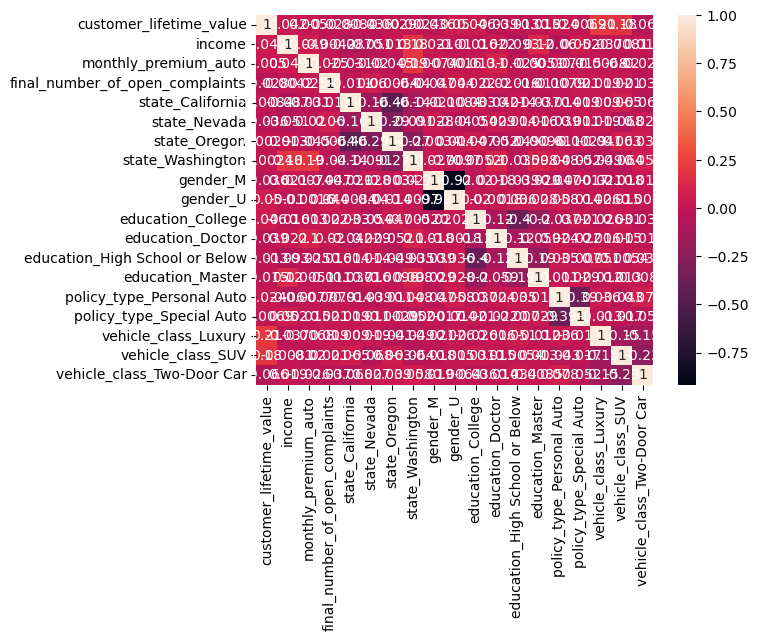

In [1017]:
correlations_matrix1 = X.corr()
sns.heatmap(correlations_matrix1, annot=True)
plt.show()


In [1018]:
correlations_matrix1

,customer_lifetime_value,income,monthly_premium_auto,final_number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,gender_U,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
customer_lifetime_value,1.000000,0.041610,0.005027,-0.028147,-0.008353,-0.036151,0.002914,-0.002400,-0.035639,0.049889,0.045802,-0.039327,-0.013240,-0.014557,0.023538,-0.006871,0.212040,0.180481,-0.066191
income,0.041610,1.000000,0.049100,-0.004161,-0.086783,-0.051172,0.012619,0.184203,0.020549,-0.010148,-0.015682,0.021951,-0.093030,0.123052,-0.059940,0.051840,-0.036591,-0.008147,0.018902
monthly_premium_auto,0.005027,0.049100,1.000000,0.025138,-0.030544,-0.020026,-0.044609,0.194137,0.007352,-0.001623,0.013084,0.101397,-0.025215,-0.005126,-0.007706,-0.015410,-0.006813,-0.020232,-0.025570
final_number_of_open_complaints,-0.028147,-0.004161,0.025138,1.000000,-0.011000,0.060070,-0.006449,-0.039640,-0.047193,0.043719,0.022475,0.019800,-0.015673,-0.011350,-0.007934,0.021381,0.019499,0.020624,-0.037010
state_California,-0.008353,-0.086783,-0.030544,-0.011000,1.000000,-0.157199,-0.459180,-0.141683,-0.021057,-0.008391,0.032700,-0.042283,0.014091,-0.037492,-0.014087,0.018514,0.009024,0.065151,-0.067950
state_Nevada,-0.036151,-0.051172,-0.020026,0.060070,-0.157199,1.000000,-0.294204,-0.090778,0.028004,-0.039873,-0.054405,0.028626,0.013868,0.016008,-0.039112,0.011315,0.019433,-0.068349,0.026685
state_Oregon,0.002914,0.012619,-0.044609,-0.006449,-0.459180,-0.294204,1.000000,-0.265165,-0.003395,0.013933,0.046680,-0.052307,-0.049443,-0.009566,-0.010543,-0.002874,-0.040694,0.062716,0.039283
state_Washington,-0.002400,0.184203,0.194137,-0.039640,-0.141683,-0.090778,-0.265165,1.000000,0.027313,-0.009717,-0.005220,0.100580,-0.034638,0.098477,0.047697,-0.052086,-0.049169,-0.064012,0.058308
gender_M,-0.035639,0.020549,0.007352,-0.047193,-0.021057,0.028004,-0.003395,0.027313,1.000000,-0.916557,-0.019821,0.018193,-0.039222,-0.028801,-0.046505,0.000168,-0.021269,-0.018438,0.019249
gender_U,0.049889,-0.010148,-0.001623,0.043719,-0.008391,-0.039873,0.013933,-0.009717,-0.916557,1.000000,0.020129,-0.001833,0.036212,0.028000,0.057519,-0.013659,0.026499,0.015041,-0.006401


In [1019]:
reduced_data1 = X.drop(['monthly_premium_auto','income','vehicle_class_Luxury', 'vehicle_class_SUV' ,'vehicle_class_Two-Door Car', 'policy_type_Personal Auto', 'policy_type_Special Auto'],axis=1)
reduced_data1.columns
#decided to take out the vehicle classes because they were evenly distributed amongst the groups graphed above against educational level. The same for the personal, corporate and special auto

Index(['customer_lifetime_value', 'final_number_of_open_complaints',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'gender_M', 'gender_U', 'education_College', 'education_Doctor',
       'education_High School or Below', 'education_Master'],
      dtype='object')

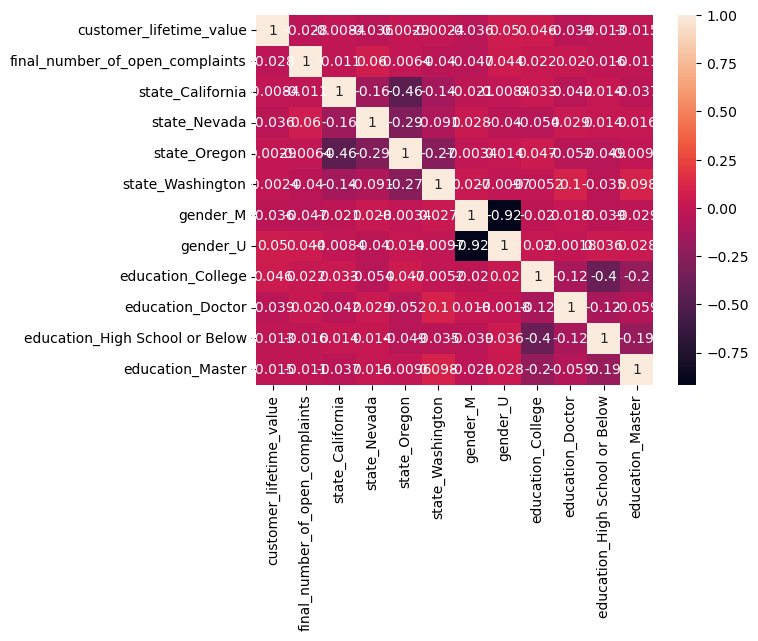

In [1020]:
correlations_matrix2 = reduced_data1.corr()
sns.heatmap(correlations_matrix2, annot=True)
plt.show()

In [1021]:
correlations_matrix2

,customer_lifetime_value,final_number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,gender_U,education_College,education_Doctor,education_High School or Below,education_Master
customer_lifetime_value,1.000000,-0.028147,-0.008353,-0.036151,0.002914,-0.002400,-0.035639,0.049889,0.045802,-0.039327,-0.013240,-0.014557
final_number_of_open_complaints,-0.028147,1.000000,-0.011000,0.060070,-0.006449,-0.039640,-0.047193,0.043719,0.022475,0.019800,-0.015673,-0.011350
state_California,-0.008353,-0.011000,1.000000,-0.157199,-0.459180,-0.141683,-0.021057,-0.008391,0.032700,-0.042283,0.014091,-0.037492
state_Nevada,-0.036151,0.060070,-0.157199,1.000000,-0.294204,-0.090778,0.028004,-0.039873,-0.054405,0.028626,0.013868,0.016008
state_Oregon,0.002914,-0.006449,-0.459180,-0.294204,1.000000,-0.265165,-0.003395,0.013933,0.046680,-0.052307,-0.049443,-0.009566
state_Washington,-0.002400,-0.039640,-0.141683,-0.090778,-0.265165,1.000000,0.027313,-0.009717,-0.005220,0.100580,-0.034638,0.098477
gender_M,-0.035639,-0.047193,-0.021057,0.028004,-0.003395,0.027313,1.000000,-0.916557,-0.019821,0.018193,-0.039222,-0.028801
gender_U,0.049889,0.043719,-0.008391,-0.039873,0.013933,-0.009717,-0.916557,1.000000,0.020129,-0.001833,0.036212,0.028000
education_College,0.045802,0.022475,0.032700,-0.054405,0.046680,-0.005220,-0.019821,0.020129,1.000000,-0.121556,-0.397130,-0.199322
education_Doctor,-0.039327,0.019800,-0.042283,0.028626,-0.052307,0.100580,0.018193,-0.001833,-0.121556,1.000000,-0.116906,-0.058676


In [1022]:
X

,customer_lifetime_value,income,monthly_premium_auto,final_number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,gender_U,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.105632,0.000000,0.026606,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.088586,0.000000,0.000935,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.193779,0.487865,0.001332,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.100450,0.000000,0.001275,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.059804,0.363715,0.000198,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0.018788,0.386595,0.000482,0.2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1067,0.326031,0.632343,0.001162,0.4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1068,0.021986,0.160674,0.000765,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1069,0.046694,0.795188,0.001502,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [1023]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(reduced_data1, y, test_size=0.30, random_state=42)

In [1024]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(749, 12)
(322, 12)
(749,)
(322,)


In [1025]:
print(y)

0          2.704934
1       1131.464935
2        566.472247
3        529.881344
4         17.269323
           ...     
1066     361.455219
1067     207.320041
1068     633.600000
1069     547.200000
1070     537.600000
Name: total_claim_amount, Length: 1071, dtype: float64


In [1026]:
lm1 = linear_model.LinearRegression()
lm1.fit(X_train1,y_train1)

LinearRegression()

In [1027]:
from sklearn.metrics import r2_score
predictions1 = lm1.predict(X_train1)
r2_score(y_train1, predictions1)

0.11747721959006252

In [1028]:
predictions_test1 = lm1.predict(X_test1)
r2_score(y_test1, predictions_test1)

0.12474070478047594

In [1029]:
y_test1[:5]

184    792.000000
572    653.656680
309    321.600000
930    311.329282
711    312.000000
Name: total_claim_amount, dtype: float64

In [1030]:
predictions_test1[:5]

array([454.82408386, 393.52090833, 444.38051222, 403.86276389,
       485.14008223])

In [1031]:
mse1=mean_squared_error(y_test1,predictions_test1)
mse1

69758.96942452976

In [1032]:
rmse1 = np.sqrt(mean_squared_error(y_test1,predictions_test1))
rmse1

264.1192333483682

In [1033]:
mae1 = mean_absolute_error(y_test1, predictions_test1)
print(mae1)

185.57740117496036


In [1034]:
#the model performance is even worse!